<a href="https://colab.research.google.com/github/Zoro114/machine_learning/blob/main/Mnist_fashion_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [122]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [123]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [124]:
X_val,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [125]:
X_train.shape

(55000, 28, 28)

In [126]:
x = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))

In [127]:
x1=x[0,:]
x1=x1*255

In [128]:
x1=x1.reshape(28,28)

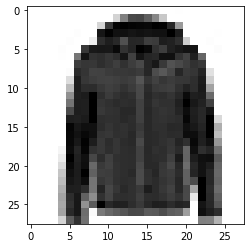

In [129]:
plt.imshow(x1,cmap='gray_r')

In [130]:
x2=x[:100,:]
x2.shape

(100, 784)

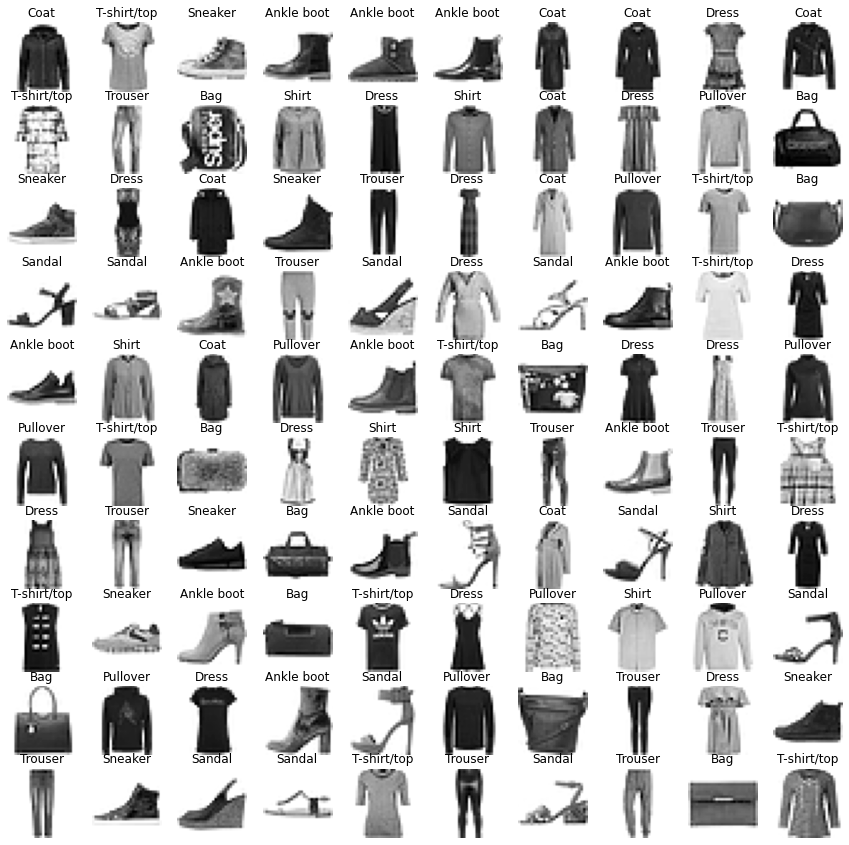

In [131]:
fig,ax=plt.subplots(nrows=10,ncols=10,figsize=(15,15))
# ax[1,2].plot([1,2,3,4])
for i in range(10):
  for j in range(10):
    x3=x2[(10*i+j),:]
    x3=x3.reshape(28,28)
    ax[i,j].imshow(x3,cmap='gray_r')
    ax[i,j].axis('off')
    ax[i,j].set_title(class_names[y_train[(10*i+j)]])



In [215]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(150,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [216]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               235500    
                                                                 
 dense_23 (Dense)            (None, 150)               45150     
                                                                 
 dense_24 (Dense)            (None, 100)               15100     
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 296,760
Trainable params: 296,760
Non-trainable params: 0
_________________________________________________________________


In [217]:
model.layers

In [218]:
model.layers[1].name

'dense_22'

In [219]:
weight,bias=model.layers[1].get_weights()
weight


array([[ 0.00078568, -0.01992633,  0.01198237, ..., -0.05049901,
        -0.05260274,  0.03628427],
       [-0.00108357,  0.0256009 ,  0.02491881, ..., -0.03649695,
        -0.00200993, -0.05071909],
       [ 0.06451118, -0.05318137, -0.01028129, ..., -0.02002817,
         0.00139595,  0.04087942],
       ...,
       [-0.03761834,  0.0468591 ,  0.05409089, ..., -0.00051578,
        -0.04480018,  0.03577635],
       [-0.01661716, -0.05894495, -0.0005876 , ...,  0.01975778,
         0.02425547,  0.01356804],
       [ 0.03714574,  0.04144618,  0.03193881, ...,  0.03792584,
         0.0229558 , -0.0367492 ]], dtype=float32)

In [220]:
weight.shape,bias,bias.shape

((784, 300),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

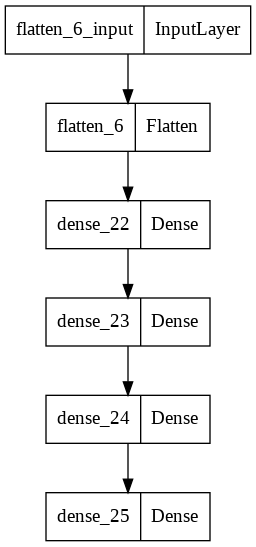

In [221]:
keras.utils.plot_model(model)

In [222]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [223]:
history = model.fit(X_train, y_train, epochs=25,
... validation_data=(X_val, y_val))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7543 - accuracy: 0.7457 - val_loss: 0.5321 - val_accuracy: 0.8130
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4892 - accuracy: 0.8285 - val_loss: 0.4328 - val_accuracy: 0.8502
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4400 - accuracy: 0.8448 - val_loss: 0.4289 - val_accuracy: 0.8552
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4090 - accuracy: 0.8549 - val_loss: 0.3826 - val_accuracy: 0.8700
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3856 - accuracy: 0.8631 - val_loss: 0.4001 - val_accuracy: 0.8530
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3671 - accuracy: 0.8701 - val_loss: 0.3699 - val_accuracy: 0.8702
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3514 - accuracy: 0.8748 - val_loss: 0.3831 - val_accuracy:

(0.0, 1.0)

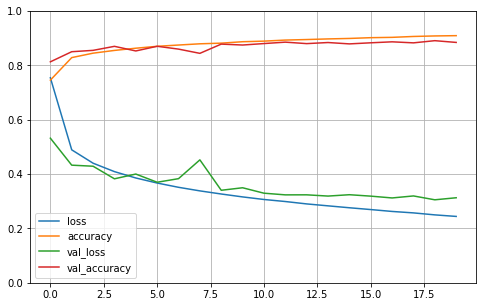

In [224]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)

In [227]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.3605 - accuracy: 0.8657


[59.36048889160156, 0.8657000064849854]